## SENTIMENT ANALYSIS USING RNN (RECURRENT NEURONAL NETWORKS)


CARLOS REY PINTO - C0868575


**1. UNDERSTANDING SENTINMENT ANALYSIS AND RNNs:**

*¿What is sentiment analysis and its applications?*

Sentiment analysis is a natural language processing technique that involves analyzing text to identify and categorize opinions, emotions, or attitudes expressed within it. This process helps determine whether the sentiment is positive, negative, or neutral. It's widely used in various industries, such as monitoring social media to gauge public opinion, analyzing customer feedback to improve products or services, and conducting market research. By understanding the emotional tone behind textual data, companies can better manage brand reputation, enhance customer satisfaction, and tailor marketing strategies.

*¿How RNNs differ from traditional feedforward neural networks?*

Recurrent Neural Networks (RNNs) differ fundamentally from traditional feedforward neural networks due to their ability to process sequences of data through the use of recurrent connections. Unlike feedforward networks, where information flows in a single direction from input to output, RNNs have loops that allow them to maintain a memory of previous inputs. This feature enables RNNs to handle tasks that involve sequential data, such as language modeling, speech recognition, and time series forecasting, by considering the context of previous inputs when making predictions.

*Hidden states concept and how information is passed through time stepts in RNNs.*

In RNNs, hidden states play a crucial role in retaining information across different time steps within a sequence. At each time step, the hidden state is updated by combining the current input with the previous hidden state, effectively carrying forward the learned context. This mechanism allows the RNN to capture dependencies throughout the sequence, enabling it to process and predict based on both current and past inputs. This is particularly important for tasks where the order of data matters, such as in natural language processing or sequential prediction tasks.

*Common issues with RNNs.*
 
Training RNNs can be challenging due to issues like vanishing and exploding gradients. These problems arise during backpropagation, especially when dealing with long sequences. Vanishing gradients occur when the gradients become too small, making it difficult for the network to learn from earlier time steps, thus hindering the learning of long-range dependencies. On the other hand, exploding gradients happen when the gradients grow too large, leading to excessively large updates that can destabilize the training process. Techniques like gradient clipping are often employed to mitigate these issues and ensure stable learning.

**2. DATASET PREPARATION**

For this assigment we will use the IMDB dataset provided by Tensorflow. 

*Importing libraries*

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Flatten, Conv1D, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

*Loading dataset and performing necessary performing*

In [2]:
# Load IMDB dataset
max_features = 10000  # Words to consider as features
maxlen = 500  # text length 

# Load the data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [3]:
# Checking loaded data is in the correct format
print(f'Type of x_train: {type(x_train)}, Type of y_train: {type(y_train)}')
print(f'Type of x_test: {type(x_test)}, Type of y_test: {type(y_test)}')

Type of x_train: <class 'numpy.ndarray'>, Type of y_train: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>, Type of y_test: <class 'numpy.ndarray'>


In [4]:
# Convert data to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**3. BUILDING RNN MODEL**

In [6]:
# Building the RNN model
model1 = Sequential()
model1.add(Input(shape=(maxlen,)))
model1.add(Embedding(input_dim=max_features, output_dim=128))
model1.add(LSTM(units=128, return_sequences=False))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

**4. TRAINING THE MODEL**

In [7]:
# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model1.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 231ms/step - accuracy: 0.7157 - loss: 0.5395 - val_accuracy: 0.8342 - val_loss: 0.4163
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.8741 - loss: 0.3191 - val_accuracy: 0.8464 - val_loss: 0.3672
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.9211 - loss: 0.2105 - val_accuracy: 0.8404 - val_loss: 0.3729
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.9319 - loss: 0.1808 - val_accuracy: 0.8596 - val_loss: 0.3620
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 234ms/step - accuracy: 0.9621 - loss: 0.1087 - val_accuracy: 0.8552 - val_loss: 0.4056
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.9649 - loss: 0.0991 - val_accuracy: 0.7392 - val_loss: 0.5700


**5. EVALUATING THE RNN MODEL**

In [8]:
# Evaluating the model
loss, accuracy = model1.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.8536 - loss: 0.3912
Test Loss: 0.38000401854515076
Test Accuracy: 0.8561999797821045


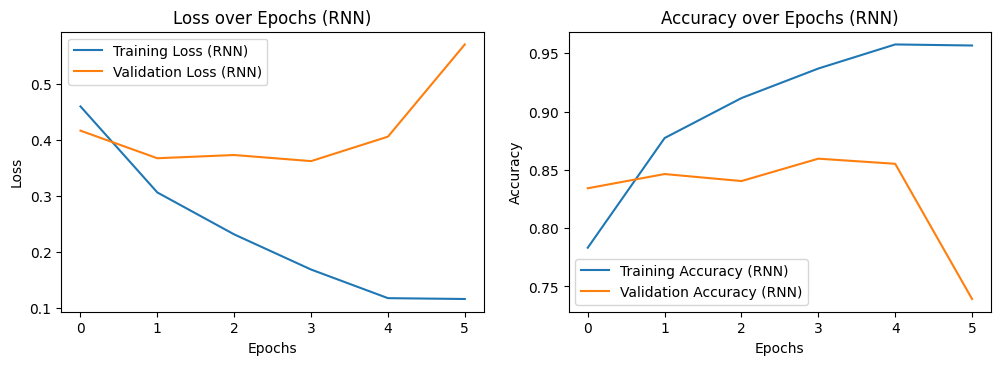

In [17]:
#Visualize RNN model Loss and Accuracy over epochs 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (RNN)')
plt.plot(history.history['val_loss'], label='Validation Loss (RNN)')
plt.title('Loss over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy (RNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (RNN)')
plt.title('Accuracy over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**6. HYPERPARAMETER TUNING** 

*For this task, i will improve the model 1 (RNN), separately, and then i will compare them with each other. I will use the following hyperparameters:*

**Units:** The number of units in each LSTM layer.

**Dropout Rate:** The percentage of units randomly turned off during training to prevent overfitting.

**Learning Rate:** The learning rate of the optimizer, controlling the magnitude of updates in each step.

**Number of Layers:** How many LSTM layers are included in the model.

**EXPECTATIONS AFTER TUNING**

*After applying the hyperparameters is expected to have:*

**Number of Layers:** Increasing the number of LSTM layers generally improves the model's ability to understand long sequences but also increases the risk of overfitting and training time.

**Learning Rate:** A lower learning rate allows for more precise updates but may require more time to converge.

**Dropout Rate:** Higher dropout helps prevent overfitting, but if it's too high, the model may not learn enough.



**Tuning RNN model increasing LSTM layers**

In [26]:
# Tuning the RNN model increasing the LSTM number. 
model1_lstm_tuning = Sequential()
model1_lstm_tuning.add(Input(shape=(maxlen,)))
model1_lstm_tuning.add(Embedding(input_dim=max_features, output_dim=128))
model1_lstm_tuning.add(LSTM(units=256, return_sequences=False))
model1_lstm_tuning.add(Dense(1, activation='sigmoid'))

# Compile the model
model1_lstm_tuning.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model1_lstm_tuning.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,674,497 (6.39 MB)

 Trainable params: 1,674,497 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Training the model with lstm tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model1_lstm_tuning.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 432s 688ms/step - accuracy: 0.6577 - loss: 0.6128 - val_accuracy: 0.8006 - val_loss: 0.4614
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 428s 685ms/step - accuracy: 0.8268 - loss: 0.3962 - val_accuracy: 0.8274 - val_loss: 0.3937
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 433s 692ms/step - accuracy: 0.8785 - loss: 0.2881 - val_accuracy: 0.8526 - val_loss: 0.3494
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 433s 694ms/step - accuracy: 0.9219 - loss: 0.2054 - val_accuracy: 0.8800 - val_loss: 0.3307
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 435s 697ms/step - accuracy: 0.9604 - loss: 0.1111 - val_accuracy: 0.8620 - val_loss: 0.3874
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 450s 720ms/step - accuracy: 0.9758 - loss: 0.0681 - val_accuracy: 0.8748 - val_loss: 0.4401


In [45]:
# Evaluating the model with lstm tuning
loss_lstm, accuracy_lstm = model1_lstm_tuning.evaluate(x_test, y_test)
print(f'Test Loss: {loss_lstm}')
print(f'Test Accuracy: {accuracy_lstm}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 256s 328ms/step - accuracy: 0.8666 - loss: 0.3553
Test Loss: 0.34788069128990173
Test Accuracy: 0.8691999912261963


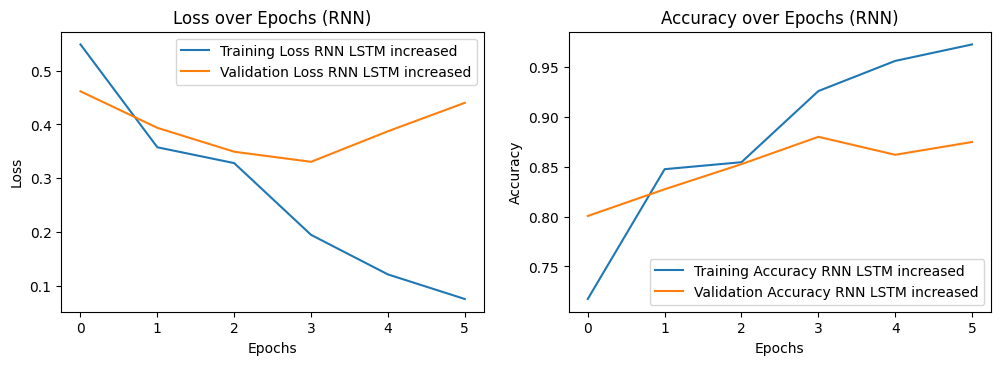

In [29]:
#Visualize Loss and Accuracy over epochs from RNN model with LSTM increased 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss RNN LSTM increased')
plt.plot(history.history['val_loss'], label='Validation Loss RNN LSTM increased')
plt.title('Loss over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy RNN LSTM increased')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy RNN LSTM increased')
plt.title('Accuracy over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**TUNING RNN MODEL CHANGING LEARNING RATE**

In [30]:
from tensorflow.keras.optimizers import Adam

# Building the RNN model 
model1_learning_tuning = Sequential()
model1_learning_tuning.add(Input(shape=(maxlen,)))
model1_learning_tuning.add(Embedding(input_dim=max_features, output_dim=128))
model1_learning_tuning.add(LSTM(units=128, return_sequences=False))
model1_learning_tuning.add(Dense(1, activation='sigmoid'))

# Optimizer with lower learning rate 
optimizer = Adam(learning_rate=0.0001)  

# Compile the model
model1_learning_tuning.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model1_learning_tuning.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training the model with learning rate tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history_learning_tuning = model1_learning_tuning.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 273ms/step - accuracy: 0.6473 - loss: 0.6270 - val_accuracy: 0.8700 - val_loss: 0.3220
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.8871 - loss: 0.2908 - val_accuracy: 0.8818 - val_loss: 0.2949
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.9271 - loss: 0.2089 - val_accuracy: 0.8856 - val_loss: 0.2888
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 271ms/step - accuracy: 0.9417 - loss: 0.1686 - val_accuracy: 0.7458 - val_loss: 0.5069
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.9126 - loss: 0.2303 - val_accuracy: 0.8744 - val_loss: 0.2961


In [46]:
# Evaluating the model with learning rate tuning
loss_learning, accuracy_learning = model1_learning_tuning.evaluate(x_test, y_test)
print(f'Test Loss: {loss_learning}')
print(f'Test Accuracy: {accuracy_learning}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.8724 - loss: 0.3043
Test Loss: 0.30633360147476196
Test Accuracy: 0.8720399737358093


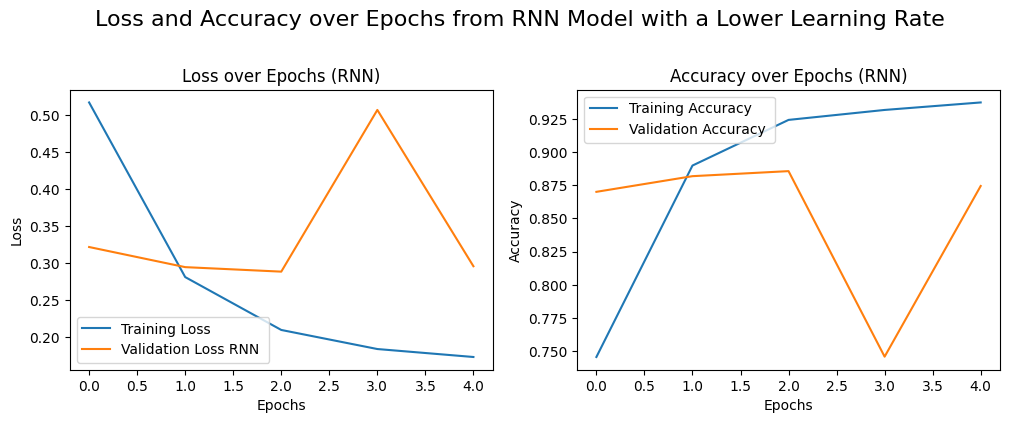

In [40]:
#Visualize Loss and Accuracy over epochs from RNN model with a lower learning rate
plt.figure(figsize=(12, 8))

plt.suptitle('Loss and Accuracy over Epochs from RNN Model with a Lower Learning Rate', fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(history_learning_tuning.history['loss'], label='Training Loss')
plt.plot(history_learning_tuning.history['val_loss'], label='Validation Loss RNN ')
plt.title('Loss over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_learning_tuning.history['accuracy'], label='Training Accuracy')
plt.plot(history_learning_tuning.history['val_accuracy'], label='Validation Accuracy ')
plt.title('Accuracy over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**TUNING RNN MODEL INCREASING DROPOUTS**

In [41]:
from tensorflow.keras.layers import Dropout

# Building the RNN model with dropout tuning 
model1_dropout_tuning = Sequential()
model1_dropout_tuning.add(Input(shape=(maxlen,)))
model1_dropout_tuning.add(Embedding(input_dim=max_features, output_dim=128))
model1_dropout_tuning.add(LSTM(units=128, return_sequences=False))
model1_dropout_tuning.add(Dropout(0.5))  # 50% dropout increased
model1_dropout_tuning.add(Dense(1, activation='sigmoid'))

# Compile the model
model1_dropout_tuning.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model1_dropout_tuning.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Training the model with dropout tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history_dropout_tuning = model1_dropout_tuning.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 243ms/step - accuracy: 0.6719 - loss: 0.5793 - val_accuracy: 0.8176 - val_loss: 0.4034
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.8568 - loss: 0.3450 - val_accuracy: 0.8064 - val_loss: 0.4230
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 270ms/step - accuracy: 0.8476 - loss: 0.3658 - val_accuracy: 0.8494 - val_loss: 0.3748
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.8996 - loss: 0.2673 - val_accuracy: 0.8474 - val_loss: 0.3641
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 349ms/step - accuracy: 0.9396 - loss: 0.1700 - val_accuracy: 0.8734 - val_loss: 0.3592
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 336ms/step - accuracy: 0.9610 - loss: 0.1158 - val_accuracy: 0.8604 - val_loss: 0.4291
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 332ms/step - accuracy: 0.9611 - loss: 0.1156 - val_accuracy: 0.8614 - val_loss: 0.4609


In [43]:
# Evaluating the model with dropout tuning
loss_dropout, accuracy_dropout = model1_dropout_tuning.evaluate(x_test, y_test)
print(f'Test Loss: {loss_dropout}')
print(f'Test Accuracy: {accuracy_dropout}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.8591 - loss: 0.3972
Test Loss: 0.3952067196369171
Test Accuracy: 0.8577600121498108


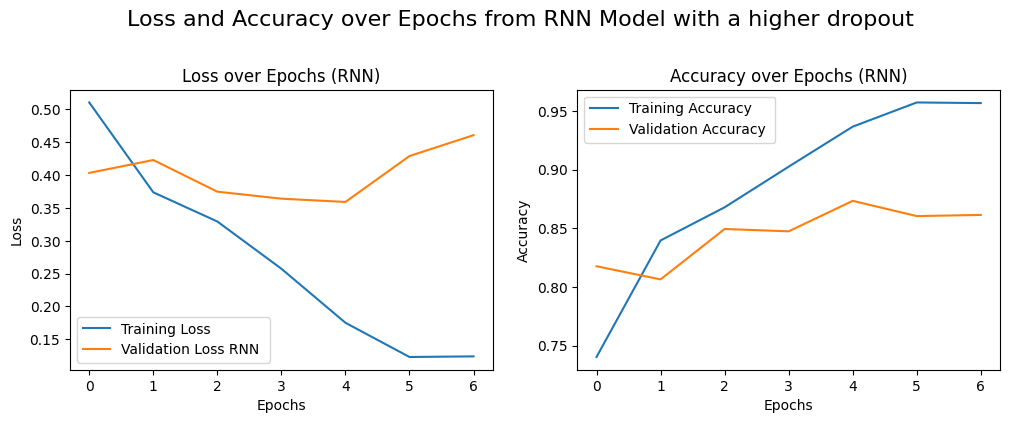

In [44]:
#Visualize Loss and Accuracy over epochs from RNN model with a higher dropout
plt.figure(figsize=(12, 8))

plt.suptitle('Loss and Accuracy over Epochs from RNN Model with a higher dropout', fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(history_dropout_tuning.history['loss'], label='Training Loss')
plt.plot(history_dropout_tuning.history['val_loss'], label='Validation Loss RNN ')
plt.title('Loss over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_dropout_tuning.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout_tuning.history['val_accuracy'], label='Validation Accuracy ')
plt.title('Accuracy over Epochs (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**COMPARING RESULTS WITH TUNING MODELS**

In [48]:
results = {
    'RNN MODEL': {'accuracy': accuracy, 'loss': loss},
    'RNN MODEL LSTM TUNING': {'accuracy': accuracy_lstm, 'loss': loss_lstm},
    'RNN MODEL LEARNING RATE TUNING': {'accuracy': accuracy_learning, 'loss': loss_learning},
    'RNN MODEL DROPOUT TUNING': {'accuracy': accuracy_dropout, 'loss': loss_dropout},
}

In [49]:
import pandas as pd

# Convert results into a DataFrame
df_results = pd.DataFrame(results).T  # Transpose to get models as rows
df_results.columns = ['Accuracy', 'Loss'] 

# Display the comparison table
print(df_results)

                                Accuracy      Loss
RNN MODEL                        0.85620  0.380004
RNN MODEL LSTM TUNING            0.86920  0.347881
RNN MODEL LEARNING RATE TUNING   0.87204  0.306334
RNN MODEL DROPOUT TUNING         0.85776  0.395207


**HYPERPARAMETERS TUNING IMPACT ON MODEL PERFORMANCE ANALYSIS**

**RNN MODEL (Baseline)**

*Interpretation:* This is the baseline RNN model before any tuning. we got an accuracy of 85.62% that means the model correctly predicted the output 85.62% of the time. The loss value of 0.380004 indicates the error or difference between the predicted and actual values.

**RNN MODEL LSTM TUNING** 

*Interpretation:* After tuning the LSTM layer adding more LSTM layers, the model's accuracy improved to 86.92%, and the loss decreased to 0.347881. This means that the model is now better at making predictions, with a slightly lower error rate.

**RNN MODEL LEARNING RATE TUNING**

*Interpretation:* Tuning the learning rate, by lowering it, resulted in the highest accuracy of 87.20% and the lowest loss of 0.306334 among all the models tuned. This means that the model is learning more effectively, leading to better performance and a more accurate representation of the underlying patterns in the data.

**RNN MODEL DROPOUT TUNING**

*Interpretation:* Tuning the dropout rate led to a small improvement in accuracy to 85.776% but resulted in a higher loss of 0.395207 compared to the baseline model. This could indicate that while dropout helped in some cases, it might have been too aggressive, leading to underfitting where the model is too simple to capture the data's complexity.

**7. COMPARATIVE ANALYSIS**

*Building a Feedforward Neural Network model to compare*

In [9]:

# Building the Feedforward Neural Network (FFN) model
model2 = Sequential()
model2.add(Input(shape=(maxlen,)))
model2.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the FFN model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the FFN model
model2.summary()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     8,192,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the FFN model
early_stopping_ffn = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history_ffn = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping_ffn])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.6936 - loss: 0.5486 - val_accuracy: 0.8650 - val_loss: 0.3217
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9770 - loss: 0.0674 - val_accuracy: 0.8416 - val_loss: 0.4361
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9987 - loss: 0.0072 - val_accuracy: 0.8528 - val_loss: 0.5526


In [11]:
# Evaluating the FFN model
loss_ffn, accuracy_ffn = model2.evaluate(x_test, y_test)
print(f'Test Loss (FFN): {loss_ffn}')
print(f'Test Accuracy (FFN): {accuracy_ffn}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8632 - loss: 0.3237
Test Loss (FFN): 0.3218636214733124
Test Accuracy (FFN): 0.8632799983024597


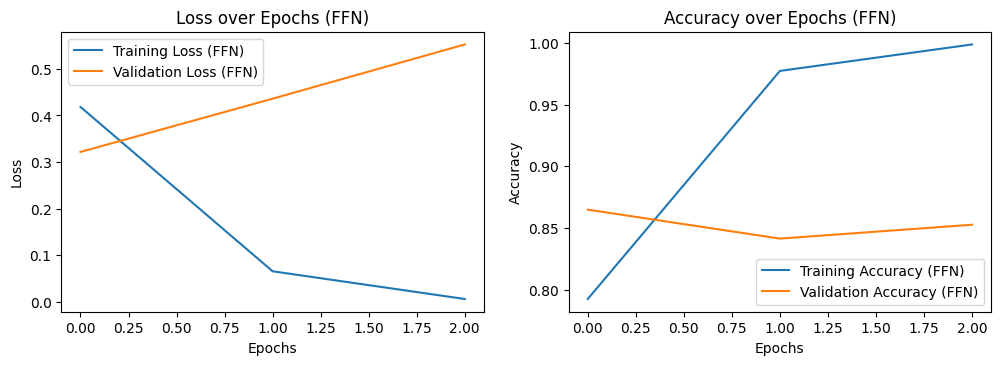

In [22]:
#Visualize FFN model Loss and Accuracy 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
plt.plot(history_ffn.history['loss'], label='Training Loss (FFN)')
plt.plot(history_ffn.history['val_loss'], label='Validation Loss (FFN)')
plt.title('Loss over Epochs (FFN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_ffn.history['accuracy'], label='Training Accuracy (FFN)')
plt.plot(history_ffn.history['val_accuracy'], label='Validation Accuracy (FFN)')
plt.title('Accuracy over Epochs (FFN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

*Building a Bidirectional LSTM model to compare*

In [12]:
# Building the Bidirectional LSTM (BiLSTM) model
model3 = Sequential()
model3.add(Input(shape=(maxlen,)))
model3.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the BiLSTM model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Train the BiLSTM model
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history_bilstm = model3.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping_bilstm])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 207ms/step - accuracy: 0.7242 - loss: 0.5243 - val_accuracy: 0.8636 - val_loss: 0.3249
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 209ms/step - accuracy: 0.8995 - loss: 0.2593 - val_accuracy: 0.8556 - val_loss: 0.3549
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.9386 - loss: 0.1693 - val_accuracy: 0.8632 - val_loss: 0.4233


In [47]:
# Evaluating the FFN model
loss_bilstm, accuracy_bilstm = model3.evaluate(x_test, y_test)
print(f'Test Loss (bilstm): {loss_bilstm}')
print(f'Test Accuracy (bilstm): {accuracy_bilstm}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8567 - loss: 0.3364
Test Loss (bilstm): 0.3326474130153656
Test Accuracy (bilstm): 0.8589199781417847


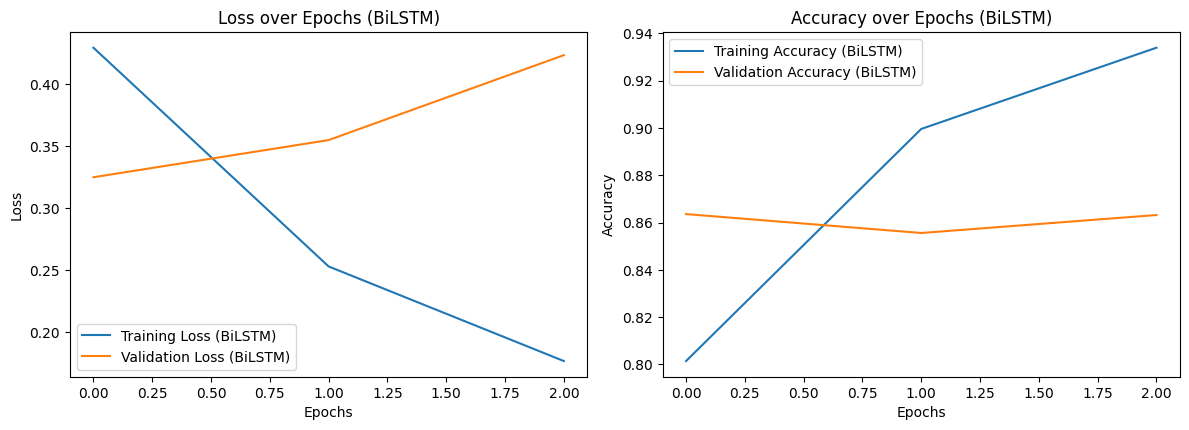

In [23]:
# Visualize BiLSTM model loss and accuracy

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_bilstm.history['loss'], label='Training Loss (BiLSTM)')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss (BiLSTM)')
plt.title('Loss over Epochs (BiLSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_bilstm.history['accuracy'], label='Training Accuracy (BiLSTM)')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy (BiLSTM)')
plt.title('Accuracy over Epochs (BiLSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**COMPARING PERFORMANCE OF THE RNN TUNED WITH THIS ALTERNATIVE MODELS**

In [50]:
general_results = {
    'RNN MODEL BEST TUNING': {'accuracy': accuracy_learning, 'loss': loss_learning},
    'FFN MODEL': {'accuracy': accuracy_ffn, 'loss': loss_ffn},
    'BIDIRECTIONAL LSTM MODEL ': {'accuracy': accuracy_bilstm, 'loss': loss_bilstm},
}

In [51]:
# Convert results into a DataFrame
df_general_results = pd.DataFrame(general_results).T  # Transpose to get models as rows
df_general_results.columns = ['Accuracy', 'Loss']  

# Display the comparison table
print(df_general_results)

                           Accuracy      Loss
RNN MODEL BEST TUNING       0.87204  0.306334
FFN MODEL                   0.85892  0.332647
BIDIRECTIONAL LSTM MODEL    0.85892  0.332647


**ANALYZING THE RESULTS**

**1. RNN MODEL BEST TUNING**

*Strengths:*

**Highest Accuracy:** This model achieved the highest accuracy (87.20%) among the three approaches, indicating that it was the best at correctly predicting the outcomes.  
 
**Lowest Loss:** The loss is also the lowest at 0.306334, suggesting also the model made fewer errors in its predictions and has the best fit to the data.  

*Weaknesses:*

**Complexity:** Tuning RNNs often involves adjusting various hyperparameters, which can be time-consuming and computationally expensive. The process of finding the optimal configuration can be intricate. 

**Training Time:** RNNs, especially with complex tuning, can have longer training times compared to simpler models like FFNs.

**2. FFN MODEL (Feedforward Neural Network)**

*Strengths:*

**Simplicity:** FFNs are generally simpler and faster to train compared to RNNs and LSTMs. This simplicity can make them easier to implement and tune.

**Stability:** The performance metrics (accuracy and loss) are decent, indicating that FFNs can provide reliable results, especially when the data doesn't have strong sequential dependencies.

*Weaknesses:*

**Lower Accuracy:** The accuracy of 85.89% is lower than the RNN model, indicating that it may not capture the underlying patterns in the data as effectively.

**Higher Loss:** The loss is slightly higher compared to the best-tuned RNN, suggesting that the model may not fit the data as well.

**3. BIDIRECTIONAL LSTM MODEL**

*Strengths:*

**Handling Sequential Data:** Bidirectional LSTM models are powerful for tasks involving sequential data, as they can capture dependencies in both directions (past and future contexts).

**Consistency:** The accuracy and loss are identical to the FFN model, which might indicate that for this particular dataset, the added complexity of the Bidirectional LSTM did not result in a significant performance improvement.

*Weaknesses:*

**Complexity:** Like RNNs, Bidirectional LSTMs are more complex and computationally expensive to train. The fact that it didn’t outperform the simpler FFN model in this case might mean the sequential nature of the data wasn’t strong enough to justify the added complexity.

**Overfitting Risk:** Bidirectional LSTMs, with their complexity, are more prone to overfitting, especially if not tuned correctly.

***CONCLUSIONS***

The **RNN Model with Best Tuning** is the strongest performer in this context, balancing accuracy and loss effectively.

The **FFN Model** is a strong, simpler alternative that performs well but might miss out on capturing some sequential data characteristics.

The **Bidirectional LSTM Model** didn’t add value beyond what the FFN provided, possibly due to the nature of the data, making it an overly complex choice for this task.